In [ ]:
# Install library
!pip install pandas scikit-learn tensorflow matplotlib seaborn

# Import library
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Baca dataset
df = pd.read_csv('gym_members_exercise_tracking.csv')
df.head()

# Tampilkan informasi dataset
print(df.info())


NameError: name 'pd' is not defined

In [ ]:
# Cek jumlah nilai kosong
print("Jumlah nilai kosong per kolom:")
print(df.isnull().sum())

# Pisahkan kolom numerik dan kategorikal
numeric_cols = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
                'Resting_BPM', 'Session_Duration (hours)', 'Fat_Percentage',
                'Water_Intake (liters)', 'BMI']

categorical_cols = ['Gender', 'Workout_Type', 'Workout_Frequency (days/week)', 'Experience_Level']

# Isi nilai kosong di kolom numerik dengan rata-rata
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Isi nilai kosong di kolom kategorikal dengan modus
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Mengisi semua nilai kosong
print(df.isnull().sum())


Jumlah nilai kosong per kolom:
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Fre

In [ ]:
# Pastikan encoding semua kolom kategorikal
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Gender', 'Workout_Type', 'Workout_Frequency (days/week)', 'Experience_Level']
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Konfirmasi hasil encoding
print(df.head())


   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56       1         88.3        1.71      180      157           60   
1   46       0         74.9        1.53      179      151           66   
2   32       0         68.1        1.66      167      122           54   
3   25       1         53.2        1.70      190      164           56   
4   38       1         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned  Workout_Type  Fat_Percentage  \
0                      1.69           1313.0             3            12.6   
1                      1.30            883.0             1            33.9   
2                      1.11            677.0             0            33.4   
3                      0.59            532.0             2            28.8   
4                      0.64            556.0             2            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0        

In [ ]:
# Isi nilai kosong di kolom numerik dengan rata-rata
df.fillna(df.mean(), inplace=True)

# Pastikan tidak ada nilai kosong lagi
print("Jumlah nilai kosong per kolom:")
print(df.isnull().sum())


Jumlah nilai kosong per kolom:
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


                Age      Gender   Weight (kg)    Height (m)       Max_BPM  \
count  9.730000e+02  973.000000  9.730000e+02  9.730000e+02  9.730000e+02   
mean   1.350981e-16    0.525180 -2.345959e-16 -8.324961e-16 -7.266085e-16   
std    1.000514e+00    0.499622  1.000514e+00  1.000514e+00  1.000514e+00   
min   -1.698893e+00    0.000000 -1.597175e+00 -1.743613e+00 -1.726066e+00   
25%   -8.775150e-01    0.000000 -7.432643e-01 -8.035741e-01 -8.579921e-01   
50%    1.081382e-01    1.000000 -1.818535e-01 -9.854471e-02  1.008143e-02   
75%    8.473782e-01    1.000000  5.729845e-01  6.064847e-01  8.781549e-01   
max    1.668756e+00    1.000000  2.644071e+00  2.173217e+00  1.659421e+00   

            Avg_BPM   Resting_BPM  Session_Duration (hours)  Calories_Burned  \
count  9.730000e+02  9.730000e+02              9.730000e+02       973.000000   
mean  -6.672748e-16 -1.830213e-16             -6.572338e-17       905.422405   
std    1.000514e+00  1.000514e+00              1.000514e+00       

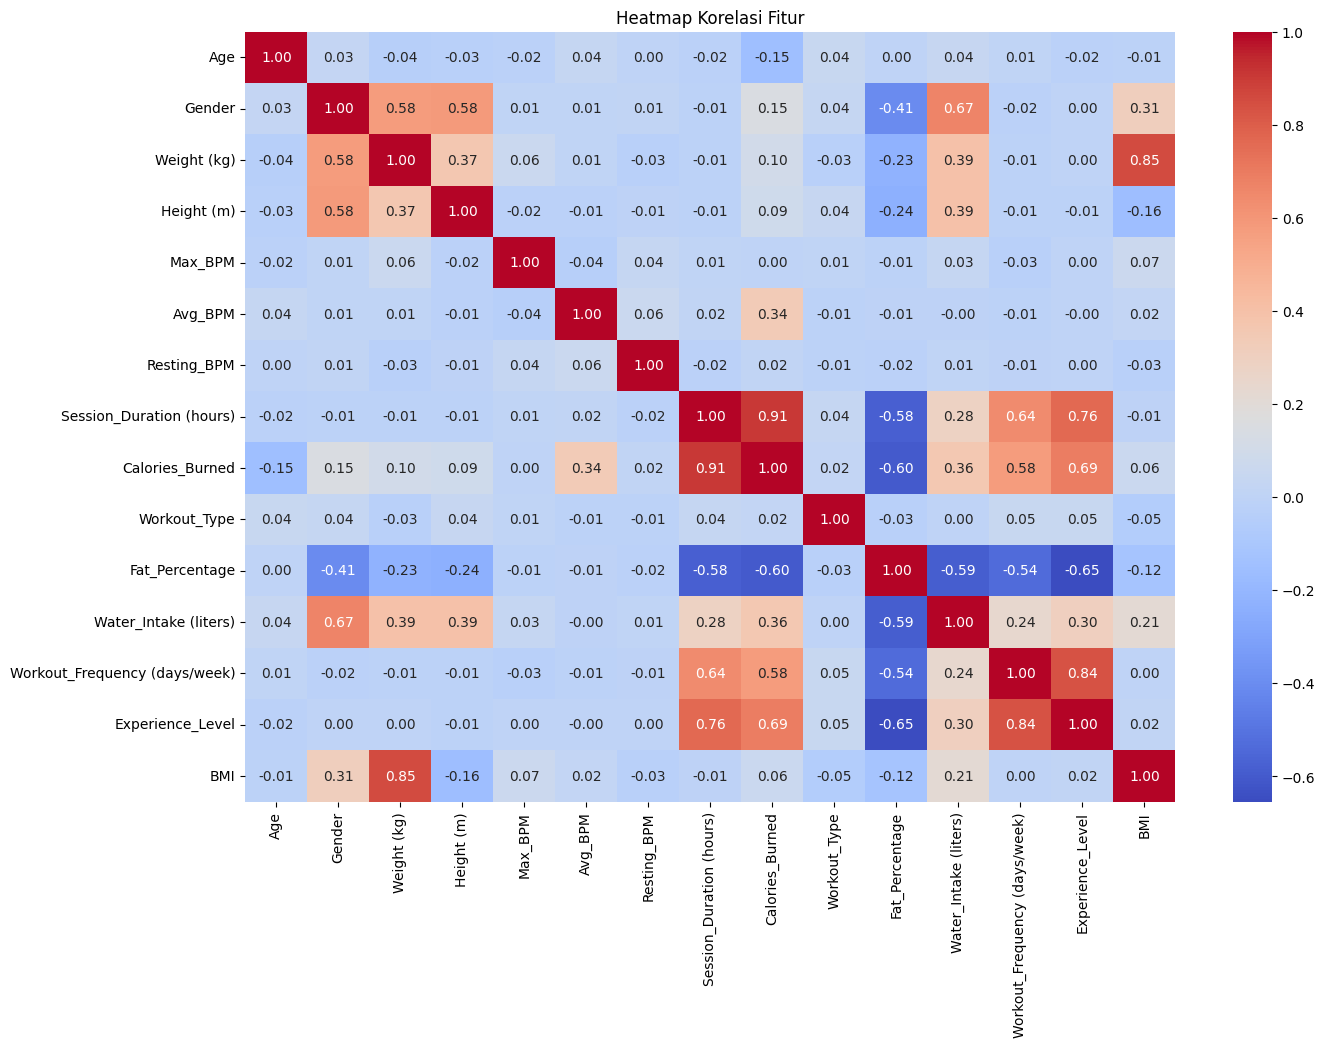

In [ ]:
# Analisis statistik deskriptif
print(df.describe())

# Korelasi data menggunakan heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur')
plt.show()


In [ ]:
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [ ]:
# Target adalah 'Calories_Burned'
X = df.drop('Calories_Burned', axis=1)
y = df['Calories_Burned']

# Split data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ukuran dataset
print(f"Ukuran data latih: {X_train.shape}, {y_train.shape}")
print(f"Ukuran data uji: {X_test.shape}, {y_test.shape}")


Ukuran data latih: (778, 14), (778,)
Ukuran data uji: (195, 14), (195,)


In [ ]:
# Definisi model DNN
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='linear')  # Output layer untuk regresi
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

# Ringkasan model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,241 (40.00 KB)

 Trainable params: 10,241 (40.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.1,
                    verbose=1)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 211ms/step - loss: 886546.2500 - mae: 902.7569 - val_loss: 924042.3750 - val_mae: 924.1959
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 875754.8750 - mae: 895.7345 - val_loss: 908706.4375 - val_mae: 916.3552
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 856353.1250 - mae: 886.4957 - val_loss: 872664.0000 - val_mae: 897.8895
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 843451.7500 - mae: 877.9965 - val_loss: 799366.7500 - val_mae: 859.4452
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 706362.9375 - mae: 805.5530 - val_loss: 676665.5625 - val_mae: 790.5499
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 590926.1875 - mae: 737.9480 - val_loss: 502539.1875 - val_mae: 679.9653
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 433811.8125 - mae: 631.7682 - val_loss: 312517.1562 - val_mae: 529.0449
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 259167.6406 - mae: 474.9135 -

In [ ]:
# Prediksi pada data uji
y_pred = model.predict(X_test)

# Hitung akurasi berdasarkan toleransi ±10%
tolerance = 0.10
accuracy = sum(abs(y_test - y_pred.flatten()) / y_test <= tolerance) / len(y_test)

print(f"Akurasi model dalam toleransi ±10%: {accuracy:.2%}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Akurasi model dalam toleransi ±10%: 60.51%


In [ ]:
# Evaluasi pada data uji
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Loss (MSE): {loss:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9851.9531 - mae: 76.3479  
Loss (MSE): 10311.3662
Mean Absolute Error (MAE): 78.5643


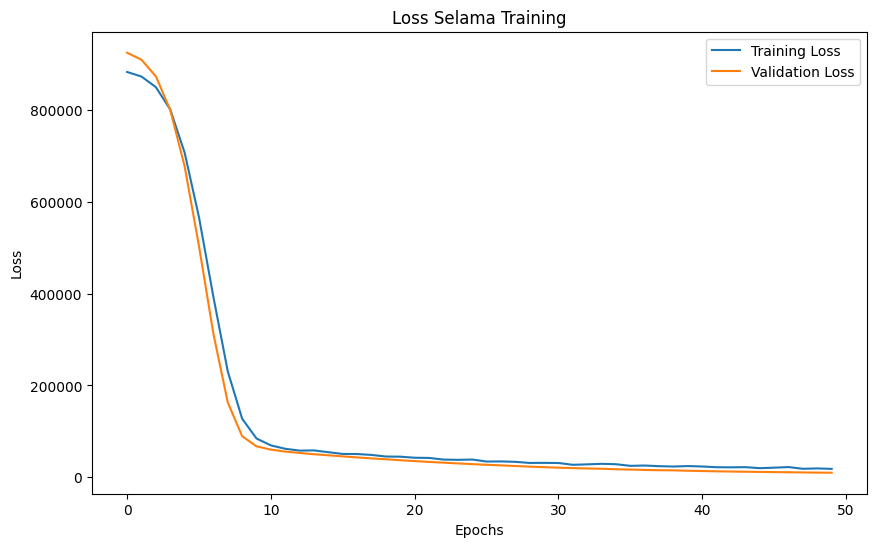

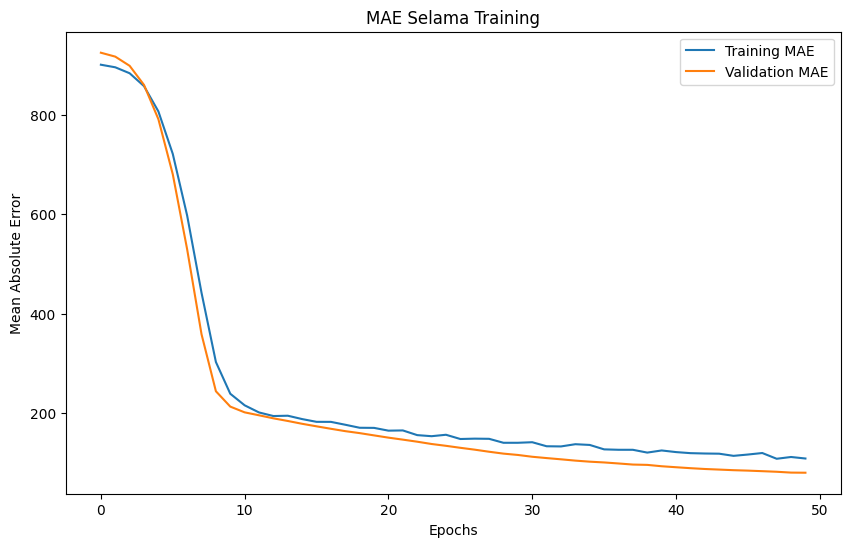

In [ ]:
# Visualisasi Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Selama Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualisasi MAE
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE Selama Training')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()


In [ ]:
# Simpan model dalam format H5
model.save('calories_burned_model.h5')
